# LEVEL 2 : TASK 1 : RESTAURANT RATING

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### DATA COLLECTION

In [2]:
df=pd.read_csv('Dataset .csv',encoding='unicode_escape')

In [3]:
df.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape

(9551, 21)

### TO CHECK NULL VALUES

In [5]:
pd.isnull(df).sum()

ï»¿Restaurant ID        0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### TO DELETE NULL VALUES

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(9542, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ï»¿Restaurant ID      9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [9]:
df.describe()

,ï»¿Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


#### ANALYZE THE DISTRIBUTION OF AGGREGATE RATINGS AND DETERMINE THE MOST COMMON RATING RANGE.

In [10]:
df.columns

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

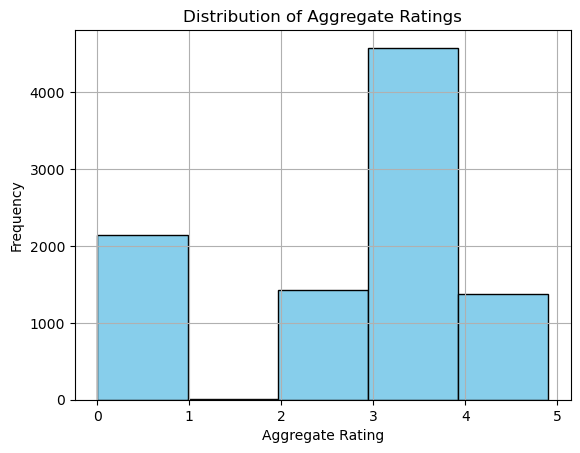

In [11]:
# Plotting the distribution of aggregate ratings
plt.hist(df['Aggregate rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
# Determine the most common rating range
rating_counts = df['Aggregate rating'].value_counts()
most_common_rating = rating_counts.idxmax()
most_common_rating_count = rating_counts.max()

In [13]:
print(f"The most common rating range is {most_common_rating} with {most_common_rating_count} restaurants.")

The most common rating range is 0.0 with 2148 restaurants.


#### CALCULATE THE AVERAGE NUMBER OF VOTES RECEIVED BY RESTAURANTS.

In [14]:
# Calculate the average number of votes received by restaurants
average_votes = df['Votes'].mean()

print("Average number of votes received by restaurants:", average_votes)

Average number of votes received by restaurants: 156.7720603647034


# LEVEL 2 : TASK 2 :CUISINE COMBINATION

#### IDENTIFY THE MOST COMMON COMBINATIONS OF CUISINES IN THE DATASET.

In [15]:
# Splitting cuisines and counting combinations
cuisine_combinations = df['Cuisines'].str.split(', ')
cuisine_counts = {}

for combination in cuisine_combinations:
    combination.sort()  # Sorting to ensure we count combinations regardless of order
    key = ', '.join(combination)
    cuisine_counts[key] = cuisine_counts.get(key, 0) + 1

In [16]:
# Finding the most common combination
most_common_combination = max(cuisine_counts, key=cuisine_counts.get)
frequency = cuisine_counts[most_common_combination]

print("Most common combination of cuisines:", most_common_combination)
print("Frequency:", frequency)

Most common combination of cuisines: North Indian
Frequency: 936


#### DETERMINE IF CERTAIN CUISINE COMBINATIONS TEND TO HAVE HIGHER RATINGS.

In [24]:
 average_rating_by_combination = df.groupby(['Cuisines'])['Aggregate rating'].mean().reset_index().max()

print("Average ratings for cuisine combinations:")
print(average_rating_by_combination)

Average ratings for cuisine combinations:
Cuisines            World Cuisine, Patisserie, Cafe
Aggregate rating                                4.9
dtype: object


In [25]:
# Calculate the average rating for each cuisine combination
average_rating_by_combination = df.groupby(['Cuisines'])['Aggregate rating'].mean().reset_index()

print("Average ratings for cuisine combinations:")
print(average_rating_by_combination)

Average ratings for cuisine combinations:
                                       Cuisines  Aggregate rating
0                                       Afghani             0.725
1                     Afghani, Mughlai, Chinese             0.000
2                         Afghani, North Indian             0.000
3     Afghani, North Indian, Pakistani, Arabian             0.000
4                                       African             4.700
...                                         ...               ...
1820                       Western, Asian, Cafe             4.200
1821                 Western, Fusion, Fast Food             3.200
1822                              World Cuisine             4.900
1823            World Cuisine, Mexican, Italian             4.400
1824            World Cuisine, Patisserie, Cafe             4.200

[1825 rows x 2 columns]


# LEVEL 2 : TASK 3 : GEOGRAPHIC ANALYSIS

#### PLOT THE LOCATIONS OF RESTAURANTS ON A MAP USING LONGITUDE AND LATITUDE COORDINATES.

In [30]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/18/09/8569904c8ce5679cc02826d98de633c07abcd2443a23181e5f71ff9dacbc/folium-0.15.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/17/ce/14166d0e273d12065516625fb02426350298e7b4ba59198b5fe454b46202/branca-0.7.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/97.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/97.0 kB ? eta -:--:--
   ---------------------------------------- 97.0/97.0 kB 1.8 MB/s eta 0:00:00


In [31]:
import folium as fl

In [32]:
df.columns

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [33]:
# Create a map centered on the mean latitude and longitude
map_restaurants = fl.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

In [38]:
# Add markers for each restaurant
for i, row in df.iterrows():
    fl.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(map_restaurants)

# Display the map
map_restaurants.save('restaurants_map.html')

#### IDENTIFY ANY PATTERNS OR CLUSTERS OF RESTAURANTS IN SPECIFIC AREA.

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

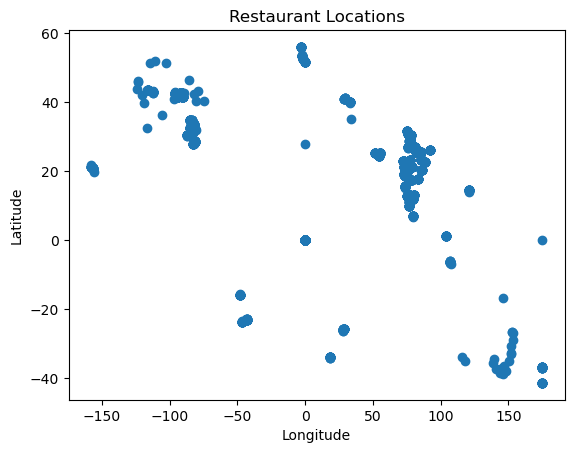

In [41]:
# Visualize the data
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Locations')
plt.show()

In [45]:
# Exclude non-numeric columns
numeric_columns = df[['Latitude', 'Longitude']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

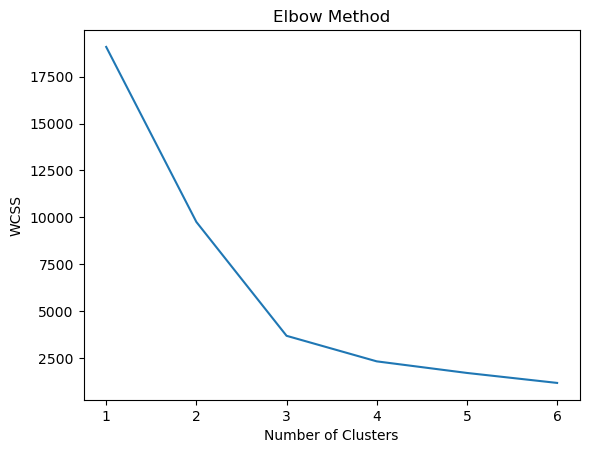

In [46]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

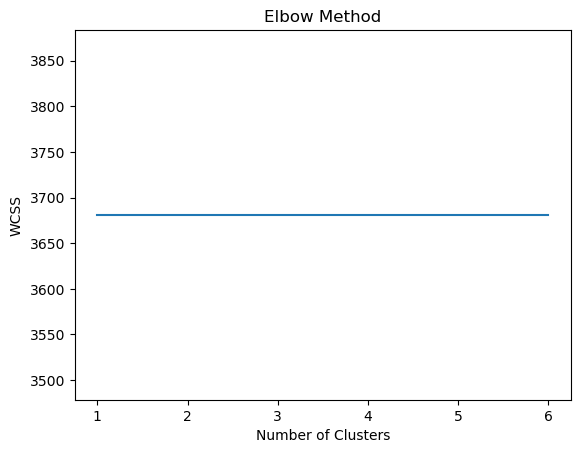

In [47]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# LEVEL 2 : TASK 4 : RESTAURANT CHAINS

#### IDENTIFY IF THERE ARE ANY RESTAURANT CHAINS PRESENT IN THE DATASET.

In [48]:
# Count the occurrences of each restaurant name
restaurant_counts = df['Restaurant Name'].value_counts()

# Find restaurant chains (those with more than one location)
restaurant_chains = restaurant_counts[restaurant_counts > 1]

# Print the list of restaurant chains
if len(restaurant_chains) > 0:
    print("Restaurant chains present in the dataset:")
    print(restaurant_chains)
else:
    print("No restaurant chains found in the dataset.")

Restaurant chains present in the dataset:
Restaurant Name
Cafe Coffee Day                   83
Domino's Pizza                    79
Subway                            63
Green Chick Chop                  51
McDonald's                        48
                                  ..
Zaika Kathi Rolls                  2
The Night Owl                      2
The Cheesecake Factory             2
New Kadimi                         2
Ceviche Tapas Bar & Restaurant     2
Name: count, Length: 734, dtype: int64


#### ANALYZE THE RATINGS AND POPULARITY OF DIFFERENT RESTAURANT CHAINS.

In [49]:
df.columns

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [51]:
# Define a mapping of textual ratings to numeric values
rating_mapping = {
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5,
    # Add more mappings as needed
}

# Map textual ratings to numeric values
df['Rating text'] = df['Rating text'].map(rating_mapping)

# Now calculate the mean rating and sum of num_ratings
chain_stats = df.groupby('Restaurant Name').agg({'Rating text': 'mean', 'Aggregate rating': 'sum'})

In [52]:
# Group by restaurant name and calculate average rating and total number of ratings
chain_stats = df.groupby('Restaurant Name').agg({'Rating text': 'mean', 'Aggregate rating': 'sum'})

# Sort the chains by total number of ratings to find the most popular ones
sorted_chains_by_popularity = chain_stats.sort_values(by='Aggregate rating', ascending=False)

# Sort the chains by average rating to find the highest-rated ones
sorted_chains_by_rating = chain_stats.sort_values(by='Rating text', ascending=False)

# Print the top 10 chains by popularity
print("Top 10 restaurant chains by popularity:")
print(sorted_chains_by_popularity.head(10))

# Print the top 10 highest-rated chains
print("\nTop 10 highest-rated restaurant chains:")
print(sorted_chains_by_rating.head(10))

Top 10 restaurant chains by popularity:
                  Rating text  Aggregate rating
Restaurant Name                                
Domino's Pizza       3.000000             216.5
Cafe Coffee Day      3.000000             200.8
Subway               3.000000             183.2
McDonald's           3.000000             160.3
Green Chick Chop     3.000000             136.3
Barbeque Nation      4.307692             113.2
Pizza Hut            3.666667              99.6
Keventers            3.000000              97.6
Giani                3.000000              78.0
Dunkin' Donuts       3.000000              69.0

Top 10 highest-rated restaurant chains:
                              Rating text  Aggregate rating
Restaurant Name                                            
Licorish Bistro                       5.0               4.6
Sushi Leblon                          5.0               4.6
Sr. Sol 1                             5.0               4.6
La Plage                              5.0  

# THANKYOU

### CONNECT WITH ME:
#### LinkedIn: https://www.linkedin.com/in/harshita-sharma-b68154220/
#### GitHub: https://github.com/DATAPREDICTS
#### Instagram: https://www.instagram.com/datapredicts?utm_source=qr&igsh=czVzc2k5c3oxOWQ4
#### YouTube: https://youtube.com/@Datapredicts?si=eDKAqVciVxg23zab